In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Meiryo'

In [2]:
rainy_days = dict()

for year in range(2018,2023):
    df = pd.read_csv(f'{year}.csv', encoding='shift-jis')
    df['date'] = pd.to_datetime(df['date'], format='%Y/%m/%d')
    df.set_index('date', inplace=True)

    # '.1'がついていない列を抽出
    df = df[df.columns[df.columns.str.contains('\.1') == False]]

    # 1.0以上なら1、1.0未満なら0に変換
    is_rain = df >= 1.0
    is_rain = is_rain.astype(int)

    # 月毎の降水日数
    rainy_days_ = is_rain.resample('M').sum()
    rainy_days_.index = rainy_days_.index.month
    rainy_days_.index.name = 'month'
    rainy_days[year] = rainy_days_.copy()

rainy_days['mean'] = sum([rainy_days[year] for year in range(2018,2023)]) / (2023-2018)

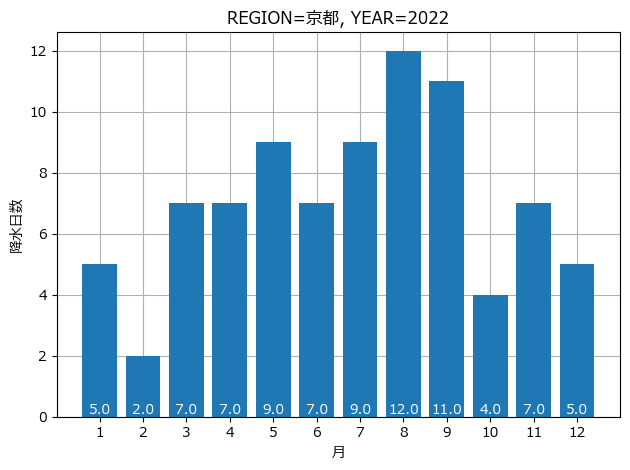

In [13]:
REGION = '京都'
YEAR = 2022

if REGION in ['mean','median','max','min']:
    result = rainy_days[YEAR].agg(REGION, axis=1)
else:
    result = rainy_days[YEAR][REGION]
plt.bar(rainy_days[YEAR].index, result, zorder=2)
for i, v in enumerate(result):
    plt.text(i+1, 0, f'{v:.1f}', ha='center', va='bottom', color='white')

plt.title(f'REGION={REGION}, YEAR={YEAR}')
plt.xlabel('月')
plt.ylabel('降水日数')
plt.xticks(np.arange(1,13))
plt.grid()
# plt.tight_layout()
# plt.savefig(f'{REGION}_{YEAR}.png')
plt.show()
